In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/My Drive/Aerial classes small"  # Adjust the path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install torch torchvision matplotlib


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Load pretrained ResNet-18 model
resnet18 = models.resnet18(pretrained=True)

# Modify the fully connected layer for 5 classes
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 5)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = resnet18.to(device)

# Print model architecture
print(resnet18)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Train dataset length: 350
Validation dataset length: 75
Test dataset length: 76
Epoch 1/20, Loss: 0.5620
Validation Loss: 18.1610, Accuracy: 40.00%
Epoch 2/20, Loss: 0.3835
Validation Loss: 4.8326, Accuracy: 49.33%
Epoch 3/20, Loss: 0.2320
Validation Loss: 1.1570, Accuracy: 72.00%
Epoch 4/20, Loss: 0.1071
Validation Loss: 0.4901, Accuracy: 85.33%
Epoch 5/20, Loss: 0.0612
Validation Loss: 0.4313, Accuracy: 88.00%
Epoch 6/20, Loss: 0.0752
Validation Loss: 0.6387, Accuracy: 80.00%
Epoch 7/20, Loss: 0.0337
Validation Loss: 1.6568, Accuracy: 74.67%
Epoch 8/20, Loss: 0.0299
Validation Loss: 0.8372, Accuracy: 82.67%
Epoch 9/20, Loss: 0.0258
Validation Loss: 0.3671, Accuracy: 86.67%
Epoch 10/20, Loss: 0.0436
Validation Loss: 0.4324, Accuracy: 86.67%
Epoch 11/20, Loss: 0.0348
Validation Loss: 0.9714, Accuracy: 76.00%
Epoch 12/20, Loss: 0.0200
Validation Loss: 0.4244, Accuracy: 86.67%
Epoch 13/20, Loss: 0.0517
Validation Loss: 0.8168, Accuracy: 82.67%
Epoch 14/20, Loss: 0.0603
Validation Loss: 0

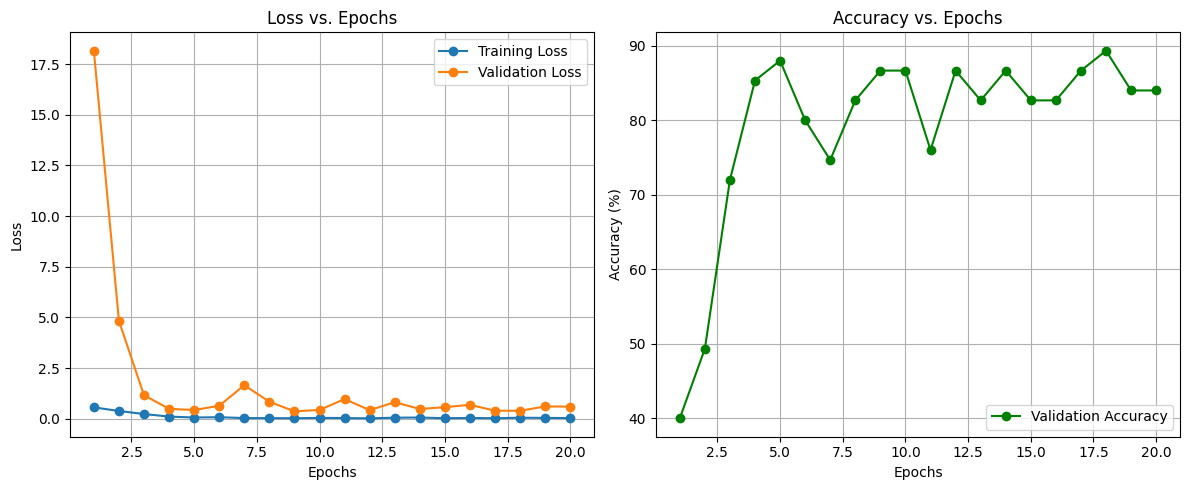

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
from torchvision import models
import matplotlib.pyplot as plt

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset path (ensure this is correct)
#data_dir = "/content/dataset"  # Adjust if needed

# Load datasets
train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=transform)
val_dataset = datasets.ImageFolder(root=f"{data_dir}/val", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{data_dir}/test", transform=transform)

# Print dataset lengths
print(f"Train dataset length: {len(train_dataset)}")
print(f"Validation dataset length: {len(val_dataset)}")
print(f"Test dataset length: {len(test_dataset)}")

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pretrained ResNet-18
resnet18 = models.resnet18(pretrained=True)
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 5)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = resnet18.to(device)

# Hyperparameters
learning_rate = 0.001
num_epochs = 20
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=learning_rate)

# Lists to store loss and accuracy
train_losses = []
val_losses = []
val_accuracies = []

# Training loop
def train_model(model, train_loader, val_loader, num_epochs, criterion, optimizer, device):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_train_loss:.4f}")

        val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

# Validation loop
def validate_model(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    accuracy = 100 * correct / total
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return avg_val_loss, accuracy

# Start training
train_model(resnet18, train_loader, val_loader, num_epochs, criterion, optimizer, device)

# Plotting accuracy and loss
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='g')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
